# Test how to plot CPMG with widgets
Let us try from this

* http://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html

In [1]:
from IPython.display import HTML
HTML('<iframe width="213" height="120" src="https://www.youtube.com/embed/p7Hr54VhOp0"></iframe>')

In [40]:
# Import python packages
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
# Widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Import relax modules
import os, sys, pathlib
sys.path.append( os.path.join(str(pathlib.Path.home()), "software", "relax" ))
# Import relax target function that prepare data
from target_functions import relax_disp
# Import library functions for each model
from lib.dispersion import cr72

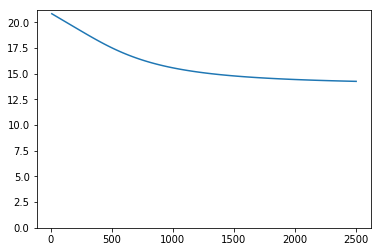

In [41]:
# Setup parameters
def cr72_calc(w0_1H=750., cpmg_e=2500, R20=15.0, dw=0.8, pA=0.99, kex=3000.):
    """
    @keyword isotope: The isotope of nuclei. Either 1H, 15N or 13C.
    @keyword w0_1H:   The spin Larmor frequencies for proton. In MHz.
    @keyword cpmg_e:  The end value of the CPMG pulse train. In Hz.
    @keyword R20:     The transversal relaxation rate. In rad/s.
    @keyword dw:      The chemical shift difference between states A and B (in ppm).
    @keyword pA:      The population of state A.
    @keyword kex:     # The exchange rate. In rad/s
    """
    isotope='15N'
    # Gyromagnetic Ratio in [MHz/T]
    # http://bio.groups.et.byu.net/LarmourFreqCal.phtml
    g = {'1H':42.576, '15N':4.3156, '13C':10.705}
    # Magnet Field Strength [T]
    B0 = w0_1H / g['1H']
    # Larmor frequency for isotope [MHz]
    w0_isotope = g[isotope]*B0 
    # The spin Larmor frequencies (in MHz*2pi to speed up the ppm to rad/s conversion)
    w0_isotope_2pi = w0_isotope*2*np.pi # The spin isotope Larmor frequencies in MHz 2pi

    # For simpel model, R20A and R20B is the same
    R20A = R20B = R20
    # Convert dw in ppm to rad/s
    dw_rad = dw * w0_isotope_2pi

    # Make x values. In Hz.
    x_cpmg_frqs = np.linspace(10, cpmg_e, num=100)

    # Make empty y_val
    y_R2 = np.zeros(x_cpmg_frqs.size)
    # Calculate y, and make in-memore replacement in y
    cr72.r2eff_CR72(r20a=R20A, r20a_orig=R20A, r20b=R20B,r20b_orig=R20B, 
           pA=pA, dw=dw_rad, dw_orig=dw, kex=kex, 
           cpmg_frqs=x_cpmg_frqs, back_calc=y_R2)

    # Plot
    plt.plot(x_cpmg_frqs, y_R2)
    p_ylim = plt.gca().get_ylim()
    plt.ylim(0, p_ylim[-1])

# plot
cr72_calc( w0_1H=750., cpmg_e=2500, R20=13.9, dw=0.7, pA=0.5, kex=4000.)



In [ ]:
# Make interactive plot
int_plot = interactive(cr72_calc, 
                       w0_1H=(500., 1000., 50), 
                       cpmg_e=(500, 5000, 500),
                       R20=(5.0, 25.0, 1.),
                       dw=(0.1, 10., 0.1),
                       pA=(0.5, 1.0, 0.05),
                       kex=(400., 10000, 200.))
#
output = int_plot.children[-1]
output.layout.height = '350px'

# Code reference in relax

## Target function

In [86]:
#help(relax_disp)
#relax_disp??

In [83]:
#help(relax_disp.Dispersion)

## CR72 model
See how the functions are defined

In [136]:
#relax_disp.Dispersion??

In [107]:
relax_disp.Dispersion.func_CR72??

Signature: relax_disp.Dispersion.func_CR72(self, params)
Source:   
    def func_CR72(self, params):
        """Target function for the reduced Carver and Richards (1972) 2-site exchange model on all time scales.

        This assumes that pA > pB, and hence this must be implemented as a constraint.  For this model, the simplification R20A = R20B is assumed.


        @param params:  The vector of parameter values.
        @type params:   numpy rank-1 float array
        @return:        The chi-squared value.
        @rtype:         float
        """

        # Scaling.
        if self.scaling_flag:
            params = dot(params, self.scaling_matrix)

        # Unpack the parameter values.
        R20 = params[:self.end_index[0]]
        dw = params[self.end_index[0]:self.end_index[1]]
        pA = params[self.end_index[1]]
        kex = params[self.end_index[1]+1]

        # Calculate and return the chi-squared value.
        return self.calc_CR72_chi2(R20A=R20, R20B=R20, dw=dw, pA=

In [106]:
relax_disp.Dispersion.calc_CR72_chi2??

Signature: relax_disp.Dispersion.calc_CR72_chi2(self, R20A=None, R20B=None, dw=None, pA=None, kex=None)
Source:   
    def calc_CR72_chi2(self, R20A=None, R20B=None, dw=None, pA=None, kex=None):
        """Calculate the chi-squared value of the Carver and Richards (1972) 2-site exchange model on all time scales.

        @keyword R20A:  The R2 value for state A in the absence of exchange.
        @type R20A:     list of float
        @keyword R20B:  The R2 value for state B in the absence of exchange.
        @type R20B:     list of float
        @keyword dw:    The chemical shift differences in ppm for each spin.
        @type dw:       list of float
        @keyword pA:    The population of state A.
        @type pA:       float
        @keyword kex:   The rate of exchange.
        @type kex:      float
        @return:        The chi-squared value.
        @rtype:         float
        """

        # Convert dw from ppm to rad/s. Use the out argument, to pass directly to structure.


In [105]:
cr72.r2eff_CR72??

Signature: cr72.r2eff_CR72(r20a=None, r20a_orig=None, r20b=None, r20b_orig=None, pA=None, dw=None, dw_orig=None, kex=None, cpmg_frqs=None, back_calc=None)
Source:   
def r2eff_CR72(r20a=None, r20a_orig=None, r20b=None, r20b_orig=None, pA=None, dw=None, dw_orig=None, kex=None, cpmg_frqs=None, back_calc=None):
    """Calculate the R2eff values for the CR72 model.

    See the module docstring for details.


    @keyword r20a:          The R20 parameter value of state A (R2 with no exchange).
    @type r20a:             numpy float array of rank [NE][NS][NM][NO][ND]
    @keyword r20a_orig:     The R20 parameter value of state A (R2 with no exchange). This is only for faster checking of zero value, which result in no exchange.
    @type r20a_orig:        numpy float array of rank-1
    @keyword r20b:          The R20 parameter value of state B (R2 with no exchange).
    @type r20b:             numpy float array of rank [NE][NS][NM][NO][ND]
    @keyword r20b_orig:     The R20 parameter valu